In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
subh = np.loadtxt('../_data/subhalos.dat')

halo_mask, = np.where((subh[:,15]==0) & (subh[:,16]==0))

subh_name = subh[:,0][halo_mask]
subh_ind  = np.int_(subh_name)
# nsubh = len(subh_name)

print(subh_ind)

[ 0  1  3  4  5  6  7  9 20 21 22 27 28 31 33 35 36 37 38 39 41 42 45 46
 49 50 51 53 54 64 65 66 69 73 74 79 84 85 87 88 90 91 92 95 96]


In [3]:
import matplotlib.pyplot as plt
import h5py
import rotation_mio as rot
import numpy as np
import time_conversion as time
import bines2 as bines

path = '/z/omarioni/gradients/_simulations/snap_127/'

for j in subh_ind[:1]:
    
    snap = h5py.File(path + 'subhalo_'+str('%03d'%j)+'.h5py', 'r')

    aexp = snap['/Time'][()]
    h    = snap['/h'][()]
    Om_L = snap['/Omega_Lambda'][()]
    Om_M = snap['/Omega_0'][()]
    R50  = snap['/SubHalfmassRad'][()]

    pstr = snap['/Str/Coordinates'][()]
    mstr = snap['/Str/Masses'][()]
    vstr = snap['/Str/Velocities'][()]

    pot  = snap['/Str/Potential'][()]
    sft  = snap['/Str/FormationTime'][()]

    age_ = time.conv2(sft, h, Om_L, Om_M)
    aa   = ~np.isnan(age_)
    age_ = age_[aa]
    age  = np.nanmax(age_) - age_
    
    r50 = R50*1000*aexp/h

    xstr = pstr[aa,0]*aexp/h
    ystr = pstr[aa,1]*aexp/h
    zstr = pstr[aa,2]*aexp/h
    rstr = np.sqrt(xstr**2+ystr**2+zstr**2)

    v_x = vstr[aa,0] *np.sqrt(aexp)
    v_y = vstr[aa,1] *np.sqrt(aexp)
    v_z = vstr[aa,2] *np.sqrt(aexp)

    #----------------------masas----------------------------
    mstr = mstr[aa]/h
    pot  = pot[aa]/aexp

    veloc,=np.where(rstr < 3)

    #----------componentes de la velocidad del centro de masa------------
    vxcm = sum(mstr[veloc]*v_x[veloc])/sum(mstr[veloc])
    vycm = sum(mstr[veloc]*v_y[veloc])/sum(mstr[veloc])
    vzcm = sum(mstr[veloc]*v_z[veloc])/sum(mstr[veloc])

    vx = v_x - vxcm
    vy = v_y - vycm
    vz = v_z - vzcm

    e1x,e2x,e3x,e1y,e2y,e3y,e1z,e2z,e3z = rot.rot1(mstr,xstr,ystr,zstr,vx,vy,vz,5)

    xn  = e1x*xstr + e1y*ystr + e1z*zstr
    yn  = e2x*xstr + e2y*ystr + e2z*zstr
    zn  = e3x*xstr + e3y*ystr + e3z*zstr
    vxn = e1x*vx + e1y*vy + e1z*vz
    vyn = e2x*vx + e2y*vy + e2z*vz
    vzn = e3x*vx + e3y*vy + e3z*vz
    
    limit, = np.where(rstr<50)
    
    Jz = xn[limit]*vyn[limit] - yn[limit]*vxn[limit]
    
    K = 0.5*(vxn[limit]**2 + vyn[limit]**2 + vzn[limit]**2)
    
    En = K + pot[limit]

In [5]:
print(pot)

[-482837.66 -482386.2  -482819.78 ... -139456.64 -139924.2  -145050.03]


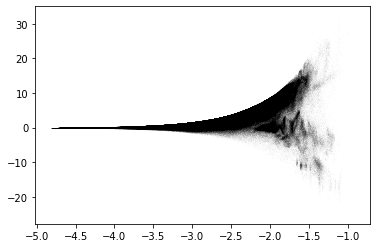

In [11]:
import matplotlib.pyplot as plt
plt.plot(En/1e5,Jz/1e3,'.k',markersize=0.01)

In [14]:
import jc

IndentationError: unindent does not match any outer indentation level (jc.py, line 24)